<a href="https://colab.research.google.com/github/yeisonnaranjo1/Introducci-n-ia-2025-2/blob/main/02_preprocesado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#IMPORTACIÓN

Cargamos el archivo kaggle.json para tener acceso a la competencia de kaggle y se importan cada una de las librerias que se utilizaran

In [3]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"yeisonnaranjogomez","key":"3b6a20c7bb9f24af61f34465da75c255"}'}

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Configuramos los permisos y descargamos los archivos

In [4]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content"

!chmod 600 /content/kaggle.json

Descargamos los archivos directamente desde kaggle

In [5]:
!kaggle competitions download -c udea-ai-4-eng-20252-pruebas-saber-pro-colombia

  0% 0.00/29.9M [00:00<?, ?B/s]
100% 29.9M/29.9M [00:00<00:00, 1.41GB/s]


Descomprimimos el archivo zip

In [6]:
import zipfile

# Descomprime el archivo
with zipfile.ZipFile("udea-ai-4-eng-20252-pruebas-saber-pro-colombia.zip", 'r') as zip_ref:
    zip_ref.extractall("udea-ai-4-eng-20252-pruebas-saber-pro-colombia")


Listamos los archivos descomprimidos

In [7]:
print(os.listdir('udea-ai-4-eng-20252-pruebas-saber-pro-colombia'))

['train.csv', 'submission_example.csv', 'test.csv']


Con panda cargamos el archivo train.csv

In [8]:
df = pd.read_csv('udea-ai-4-eng-20252-pruebas-saber-pro-colombia/train.csv')

# Exploramos el archivo

In [9]:
df.head()

,ID,PERIODO_ACADEMICO,E_PRGM_ACADEMICO,E_PRGM_DEPARTAMENTO,E_VALORMATRICULAUNIVERSIDAD,E_HORASSEMANATRABAJA,F_ESTRATOVIVIENDA,F_TIENEINTERNET,F_EDUCACIONPADRE,F_TIENELAVADORA,...,E_PRIVADO_LIBERTAD,E_PAGOMATRICULAPROPIO,F_TIENECOMPUTADOR,F_TIENEINTERNET.1,F_EDUCACIONMADRE,RENDIMIENTO_GLOBAL,INDICADOR_1,INDICADOR_2,INDICADOR_3,INDICADOR_4
0,904256,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Si,...,N,No,Si,Si,Postgrado,medio-alto,0.322,0.208,0.310,0.267
1,645256,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Si,...,N,No,Si,No,Técnica o tecnológica incompleta,bajo,0.311,0.215,0.292,0.264
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Si,...,N,No,No,Si,Secundaria (Bachillerato) completa,bajo,0.297,0.214,0.305,0.264
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Si,...,N,No,Si,Si,Secundaria (Bachillerato) completa,alto,0.485,0.172,0.252,0.190
4,989032,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Si,...,N,No,Si,Si,Primaria completa,medio-bajo,0.316,0.232,0.285,0.294


*   Número de filas y columnas
*   Tipo de dato en las columnas
*   Datos faltantes



In [10]:
#cantidad de datos
df.shape

(692500, 21)

In [11]:
#tipo de datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 692500 entries, 0 to 692499
Data columns (total 21 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   ID                           692500 non-null  int64  
 1   PERIODO_ACADEMICO            692500 non-null  int64  
 2   E_PRGM_ACADEMICO             692500 non-null  object 
 3   E_PRGM_DEPARTAMENTO          692500 non-null  object 
 4   E_VALORMATRICULAUNIVERSIDAD  686213 non-null  object 
 5   E_HORASSEMANATRABAJA         661643 non-null  object 
 6   F_ESTRATOVIVIENDA            660363 non-null  object 
 7   F_TIENEINTERNET              665871 non-null  object 
 8   F_EDUCACIONPADRE             669322 non-null  object 
 9   F_TIENELAVADORA              652727 non-null  object 
 10  F_TIENEAUTOMOVIL             648877 non-null  object 
 11  E_PRIVADO_LIBERTAD           692500 non-null  object 
 12  E_PAGOMATRICULAPROPIO        686002 non-null  object 
 13 

In [12]:
#datos faltantes por culumnna
df.isna().sum()

,0
ID,0
PERIODO_ACADEMICO,0
E_PRGM_ACADEMICO,0
E_PRGM_DEPARTAMENTO,0
E_VALORMATRICULAUNIVERSIDAD,6287
E_HORASSEMANATRABAJA,30857
F_ESTRATOVIVIENDA,32137
F_TIENEINTERNET,26629
F_EDUCACIONPADRE,23178
F_TIENELAVADORA,39773


Analizamos que columans tienen variables categoricas

In [13]:
ccols = [i for i in df.columns if not i in df._get_numeric_data()]
print (ccols)

['E_PRGM_ACADEMICO', 'E_PRGM_DEPARTAMENTO', 'E_VALORMATRICULAUNIVERSIDAD', 'E_HORASSEMANATRABAJA', 'F_ESTRATOVIVIENDA', 'F_TIENEINTERNET', 'F_EDUCACIONPADRE', 'F_TIENELAVADORA', 'F_TIENEAUTOMOVIL', 'E_PRIVADO_LIBERTAD', 'E_PAGOMATRICULAPROPIO', 'F_TIENECOMPUTADOR', 'F_TIENEINTERNET.1', 'F_EDUCACIONMADRE', 'RENDIMIENTO_GLOBAL']


Posibles valores de variables categoricas

In [14]:
for c in ccols:
    print ("%10s"%c, np.unique(df[c].dropna()))

E_PRGM_ACADEMICO ['3°  CICLO PROFESIONAL NEGOCIOS INTERNACIONALES'
 'ACTIVIDAD FISICA Y DEPORTE' 'ACUICULTURA' 'ADMINISTRACION'
 'ADMINISTRACION  FINANCIERA' 'ADMINISTRACION & SERVICIO'
 'ADMINISTRACION AERONAUTICA' 'ADMINISTRACION AGROPECUARIA'
 'ADMINISTRACION AMBIENTAL'
 'ADMINISTRACION AMBIENTAL Y DE LOS RECURSOS NATURALES'
 'ADMINISTRACION BANCARIA Y FINANCIERA' 'ADMINISTRACION COMERCIAL'
 'ADMINISTRACION COMERCIAL Y DE MERCADEO'
 'ADMINISTRACION DE COMERCIO EXTERIOR' 'ADMINISTRACION DE EMPRESAS'
 'ADMINISTRACION DE EMPRESAS  Y  GESTION AMBIENTAL'
 'ADMINISTRACION DE EMPRESAS AGROINDUSTRIALES'
 'ADMINISTRACION DE EMPRESAS AGROPECUARIAS'
 'ADMINISTRACION DE EMPRESAS COMERCIALES'
 'ADMINISTRACION DE EMPRESAS EN TELECOMUNICACIONES'
 'ADMINISTRACION DE EMPRESAS TURISTICA'
 'ADMINISTRACION DE EMPRESAS TURISTICAS'
 'ADMINISTRACION DE EMPRESAS TURISTICAS Y HOTELERAS'
 'ADMINISTRACION DE EMPRESAS TURÍSTICAS Y HOTELERAS'
 'ADMINISTRACION DE EMPRESAS Y FINANZAS'
 'ADMINISTRACION DE GESTISN 

Analizamos puntualmente una columna importante para el objetivo de la competencia

In [15]:
c="RENDIMIENTO_GLOBAL"
df[c].value_counts()

,count
RENDIMIENTO_GLOBAL,
alto,175619
bajo,172987
medio-bajo,172275
medio-alto,171619


Hacemos un analisis gráfico de algunas columnas con relacion al rendimiento global

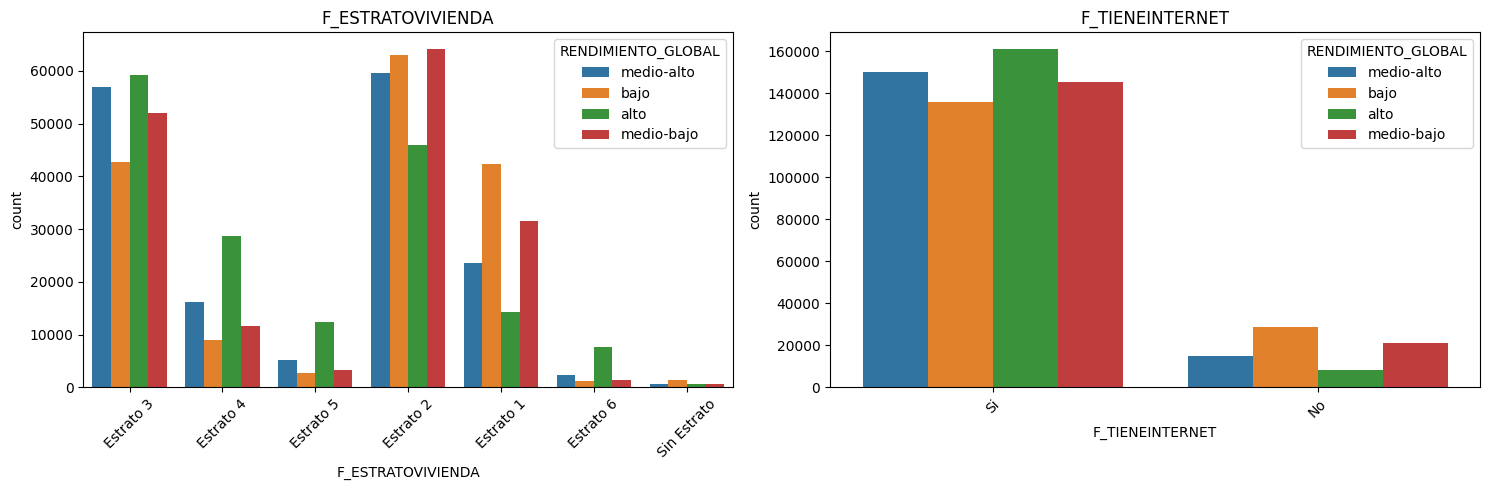

In [16]:
# Variables que deseas graficar
variables = ["F_ESTRATOVIVIENDA","F_TIENEINTERNET"]

plt.figure(figsize=(15, 5))

# Itera sobre las variables y crea un gráfico para cada una
for i, c in enumerate(variables):
    plt.subplot(1, len(variables), i + 1)
    sns.countplot(x=c, hue="RENDIMIENTO_GLOBAL", data=df)
    plt.title(c)
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

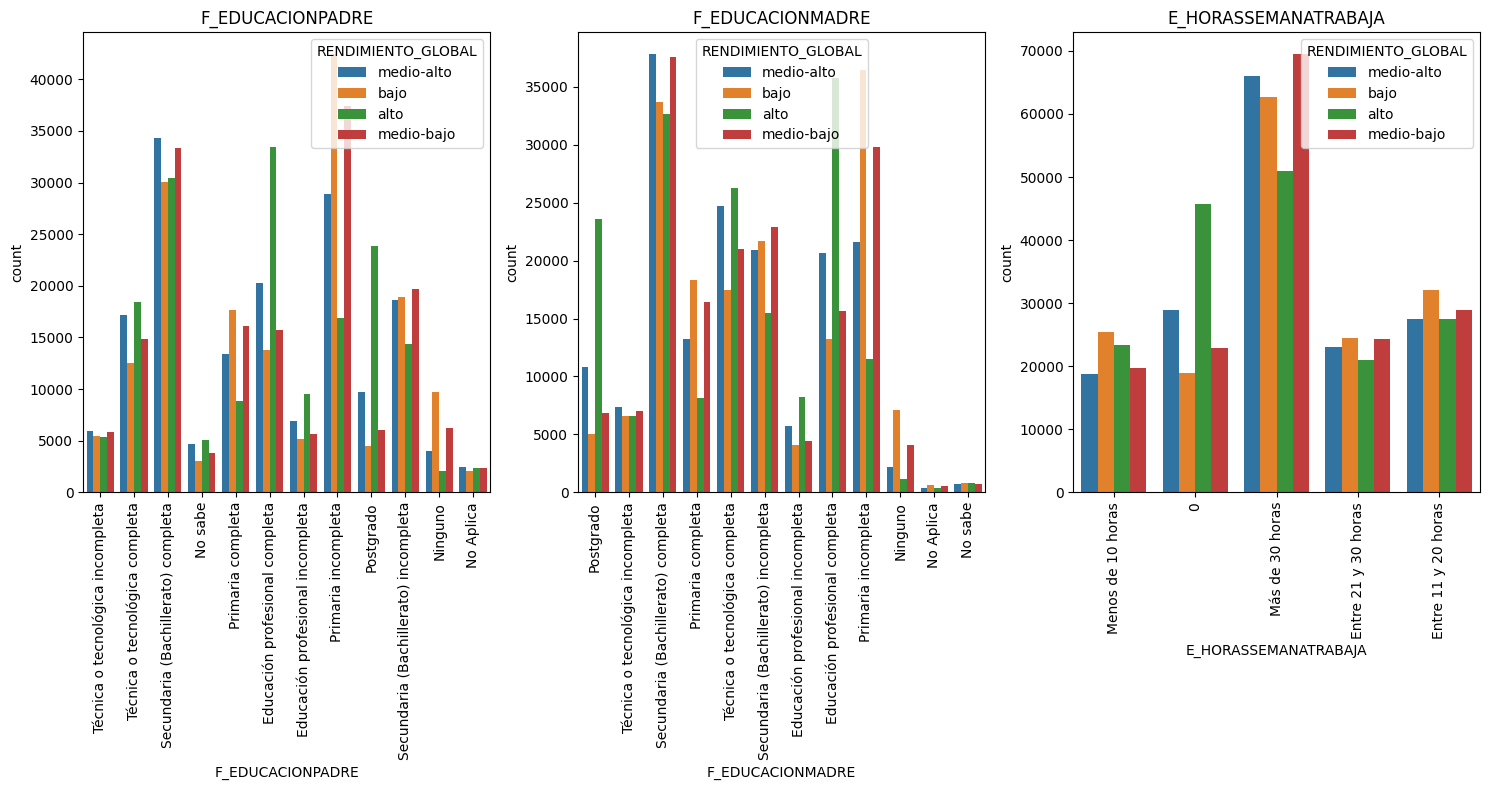

In [17]:
# Variables que deseas graficar
variables = ["F_EDUCACIONPADRE","F_EDUCACIONMADRE","E_HORASSEMANATRABAJA"]

plt.figure(figsize=(15, 8))

# Itera sobre las variables y crea un gráfico para cada una
for i, c in enumerate(variables):
    plt.subplot(1, len(variables), i + 1)
    sns.countplot(x=c, hue="RENDIMIENTO_GLOBAL", data=df)
    plt.title(c)
    plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

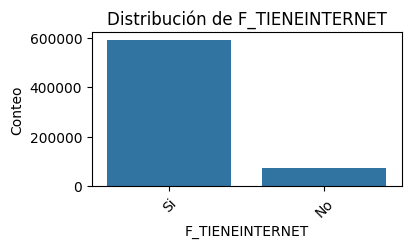

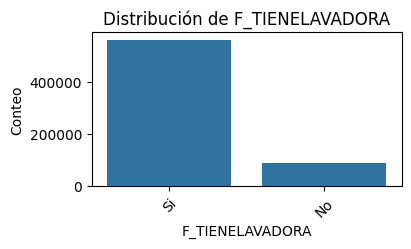

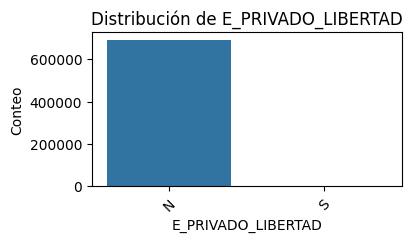

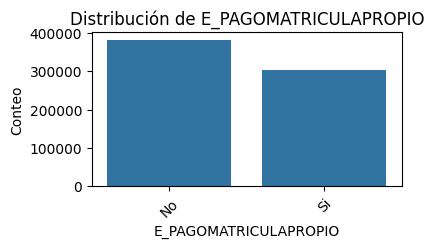

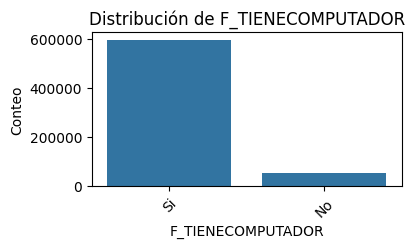

In [18]:

# Define las variables que deseas graficar
variables = ["F_TIENEINTERNET","F_TIENELAVADORA", "E_PRIVADO_LIBERTAD","E_PAGOMATRICULAPROPIO", "F_TIENECOMPUTADOR"]

# Crea un bucle para graficar cada variable
for var in variables:
    plt.figure(figsize=(4, 2))
    sns.countplot(x=var, data=df)
    plt.title(f'Distribución de {var}')
    plt.xlabel(var)
    plt.ylabel('Conteo')
    plt.xticks(rotation=45)
    plt.show()


**Copia del dataFrame original**

In [19]:
df_copy = df.copy()

#ANÁLISIS

Teniendo en cuenta la infomación anterior estudiando el dataFrame se llega a dos primeras conclusiones.


*   La columna E_PRIVADO_LIBERTAD no es necesaria ya que no tiene mayor diferencia en sus valores
*   Se elimina la columna F_TIENEINTERNET.1, ya que se encuentra repetida



In [20]:

df_copy = df_copy.drop('E_PRIVADO_LIBERTAD', axis=1)
df_copy = df_copy.drop('F_TIENEINTERNET.1', axis=1)


#Reemplazamos datos faltantes
Para los datos faltantes en cada columna se reemplazara por el valor que mas se repite

In [21]:
#variables categoricas
ccols = [i for i in df_copy.columns if not i in df._get_numeric_data()]
print (ccols)

['E_PRGM_ACADEMICO', 'E_PRGM_DEPARTAMENTO', 'E_VALORMATRICULAUNIVERSIDAD', 'E_HORASSEMANATRABAJA', 'F_ESTRATOVIVIENDA', 'F_TIENEINTERNET', 'F_EDUCACIONPADRE', 'F_TIENELAVADORA', 'F_TIENEAUTOMOVIL', 'E_PAGOMATRICULAPROPIO', 'F_TIENECOMPUTADOR', 'F_EDUCACIONMADRE', 'RENDIMIENTO_GLOBAL']


Se hace busqueda para saber cual es es dato que mas se repite en cada columna y de esta forma ser utilizado para reemplazar en los datos faltantes

In [22]:
valor_dato_comun = df_copy[ccols].mode().iloc[0]
valor_dato_comun

,0
E_PRGM_ACADEMICO,DERECHO
E_PRGM_DEPARTAMENTO,BOGOTÁ
E_VALORMATRICULAUNIVERSIDAD,Entre 1 millón y menos de 2.5 millones
E_HORASSEMANATRABAJA,Más de 30 horas
F_ESTRATOVIVIENDA,Estrato 2
F_TIENEINTERNET,Si
F_EDUCACIONPADRE,Secundaria (Bachillerato) completa
F_TIENELAVADORA,Si
F_TIENEAUTOMOVIL,No
E_PAGOMATRICULAPROPIO,No


In [23]:
for column in ccols:
  df_copy[column].fillna(valor_dato_comun[column], inplace=True)

/tmp/ipython-input-236376047.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_copy[column].fillna(valor_dato_comun[column], inplace=True)


Hacemos la confirmación de la modificación

In [24]:
pd.isnull(df_copy).sum()

,0
ID,0
PERIODO_ACADEMICO,0
E_PRGM_ACADEMICO,0
E_PRGM_DEPARTAMENTO,0
E_VALORMATRICULAUNIVERSIDAD,0
E_HORASSEMANATRABAJA,0
F_ESTRATOVIVIENDA,0
F_TIENEINTERNET,0
F_EDUCACIONPADRE,0
F_TIENELAVADORA,0


#**Normalizacion de Valores**

Para la columna **F_ESTRATOVIVIENDA** se van a categorizar los valores del 0 al 6 de la siguiente manera

0  = Sin Estrato,
1 = Estrato 1,
2 = Estrato 2,
3 = Estrato 3,
4 = Estrato 4,
5 = Estrato 5,
6 = Estrato 6.


In [25]:
df_copy['F_ESTRATOVIVIENDA'].replace(['Estrato 1','Estrato 2','Estrato 3','Estrato 4','Estrato 5','Estrato 6','Sin Estrato'],[1,2,3,4,5,6,0],inplace=True)

/tmp/ipython-input-2563841127.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_copy['F_ESTRATOVIVIENDA'].replace(['Estrato 1','Estrato 2','Estrato 3','Estrato 4','Estrato 5','Estrato 6','Sin Estrato'],[1,2,3,4,5,6,0],inplace=True)


In [26]:
df_copy['RENDIMIENTO_GLOBAL'].replace(['bajo','medio-bajo','medio-alto','alto'],[1,2,3,4],inplace=True)

/tmp/ipython-input-222131076.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_copy['RENDIMIENTO_GLOBAL'].replace(['bajo','medio-bajo','medio-alto','alto'],[1,2,3,4],inplace=True)
/tmp/ipython-input-222131076.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_copy['RENDIMIENTO_GLOBAL'].repl

#**Columnas de Si y No**

Para las columnas con valores de Si y No que son:

F_TIENEINTERNET,
F_TIENELAVADORA,
F_TIENEAUTOMOVIL,
E_PAGOMATRICULAPROPIO,
F_TIENECOMPUTADOR.
Se les dara la categorización de la siguiente manera:

0 = No

1 = Si


In [27]:
df_copy["F_TIENEINTERNET"] = df_copy["F_TIENEINTERNET"].replace({'Si': 1, 'No': 0})
df_copy["F_TIENELAVADORA"] = df_copy["F_TIENELAVADORA"].replace({'Si': 1, 'No': 0})
df_copy["F_TIENEAUTOMOVIL"] = df_copy["F_TIENEAUTOMOVIL"].replace({'Si': 1, 'No': 0})
df_copy["E_PAGOMATRICULAPROPIO"] = df_copy["E_PAGOMATRICULAPROPIO"].replace({'Si': 1, 'No': 0})
df_copy["F_TIENECOMPUTADOR"] = df_copy["F_TIENECOMPUTADOR"].replace({'Si': 1, 'No': 0})

/tmp/ipython-input-3957824259.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_copy["F_TIENEINTERNET"] = df_copy["F_TIENEINTERNET"].replace({'Si': 1, 'No': 0})
/tmp/ipython-input-3957824259.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_copy["F_TIENELAVADORA"] = df_copy["F_TIENELAVADORA"].replace({'Si': 1, 'No': 0})
/tmp/ipython-input-3957824259.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_object

Para la columna E_VALORMATRICULAUNIVERSIDAD se va a categorizar con los valores del 0 al 7 de la siguiente manera

0 = No pagó matrícula

1 = Menos de 500 mil

2 = Entre 500 mil y menos de 1 millón

3 = Entre 1 millón y menos de 2.5 millones

4 = Entre 2.5 millones y menos de 4 millones

5 = Entre 4 millones y menos de 5.5 millones

6 = Entre 5.5 millones y menos de 7 millones

**7** = Más de 7 millones

In [28]:
df_copy['E_VALORMATRICULAUNIVERSIDAD'].replace(['No pagó matrícula'],[0],inplace=True)
df_copy['E_VALORMATRICULAUNIVERSIDAD'].replace(['Menos de 500 mil'],[1],inplace=True)
df_copy['E_VALORMATRICULAUNIVERSIDAD'].replace(['Entre 500 mil y menos de 1 millón'],[2],inplace=True)
df_copy['E_VALORMATRICULAUNIVERSIDAD'].replace(['Entre 1 millón y menos de 2.5 millones'],[3],inplace=True)
df_copy['E_VALORMATRICULAUNIVERSIDAD'].replace(['Entre 2.5 millones y menos de 4 millones'],[4],inplace=True)
df_copy['E_VALORMATRICULAUNIVERSIDAD'].replace(['Entre 4 millones y menos de 5.5 millones'],[5],inplace=True)
df_copy['E_VALORMATRICULAUNIVERSIDAD'].replace(['Entre 5.5 millones y menos de 7 millones'],[6],inplace=True)
df_copy['E_VALORMATRICULAUNIVERSIDAD'].replace(['Más de 7 millones'],[7],inplace=True)

/tmp/ipython-input-1664681995.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_copy['E_VALORMATRICULAUNIVERSIDAD'].replace(['No pagó matrícula'],[0],inplace=True)
/tmp/ipython-input-1664681995.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_copy['E_VALORMATRICULAUNIVERSIDAD'].replace(['

Para la columna E_HORASSEMANATRABAJA se va a categorizar con valores del 0 al 4 de la siguiente manera:

0 = 0

1 = Menos de 10 horas

2 = Entre 11 y 20 horas

3 = Entre 21 y 30 horas

4 = Más de 30 horas

In [29]:
df_copy['E_HORASSEMANATRABAJA'].replace(['0','Menos de 10 horas','Entre 11 y 20 horas','Entre 21 y 30 horas','Más de 30 horas'],[0,1,2,3,4],inplace=True)

/tmp/ipython-input-2544350403.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_copy['E_HORASSEMANATRABAJA'].replace(['0','Menos de 10 horas','Entre 11 y 20 horas','Entre 21 y 30 horas','Más de 30 horas'],[0,1,2,3,4],inplace=True)
/tmp/ipython-input-2544350403.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downc

In [30]:
df_copy.head()

,ID,PERIODO_ACADEMICO,E_PRGM_ACADEMICO,E_PRGM_DEPARTAMENTO,E_VALORMATRICULAUNIVERSIDAD,E_HORASSEMANATRABAJA,F_ESTRATOVIVIENDA,F_TIENEINTERNET,F_EDUCACIONPADRE,F_TIENELAVADORA,F_TIENEAUTOMOVIL,E_PAGOMATRICULAPROPIO,F_TIENECOMPUTADOR,F_EDUCACIONMADRE,RENDIMIENTO_GLOBAL,INDICADOR_1,INDICADOR_2,INDICADOR_3,INDICADOR_4
0,904256,20212,ENFERMERIA,BOGOTÁ,6,1,3,1,Técnica o tecnológica incompleta,1,1,0,1,Postgrado,3,0.322,0.208,0.310,0.267
1,645256,20212,DERECHO,ATLANTICO,4,0,3,0,Técnica o tecnológica completa,1,0,0,1,Técnica o tecnológica incompleta,1,0.311,0.215,0.292,0.264
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,4,4,3,1,Secundaria (Bachillerato) completa,1,0,0,0,Secundaria (Bachillerato) completa,1,0.297,0.214,0.305,0.264
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,5,0,4,1,No sabe,1,0,0,1,Secundaria (Bachillerato) completa,4,0.485,0.172,0.252,0.190
4,989032,20212,PSICOLOGIA,ANTIOQUIA,4,3,3,1,Primaria completa,1,1,0,1,Primaria completa,2,0.316,0.232,0.285,0.294


#ANÁLIS DE LA COLUMNA E_PRGM_ACADEMICO

In [31]:
# Reemplazar la parte "PROFESIONAL EN" con una cadena vacía
df_copy['E_PRGM_ACADEMICO'] = df_copy['E_PRGM_ACADEMICO'].str.replace('PROFESIONAL EN ', '')

Para la columna E_PRGM_ACADEMICO se decide hacer agrupación por los programas que tengan alguna relación

Ejemplo:

Para todas las INGENIERIAS se decide reemplazar por la palabra INGENIERIA

Para todas las LICENCIATURAS se decide reemplazar por la palabra LICENCIATURA

In [32]:
df_copy['E_PRGM_ACADEMICO'] = df_copy['E_PRGM_ACADEMICO'].apply(lambda x: 'INGENIERIA' if x.startswith('INGE') else x)
df_copy['E_PRGM_ACADEMICO'] = df_copy['E_PRGM_ACADEMICO'].apply(lambda x: 'LICENCIATURA' if x.startswith('LIC') or x.startswith('Lic') else x)
df_copy['E_PRGM_ACADEMICO'] = df_copy['E_PRGM_ACADEMICO'].apply(lambda x: 'ADMINISTRACION' if x.startswith('ADM')   else x)
df_copy['E_PRGM_ACADEMICO'] = df_copy['E_PRGM_ACADEMICO'].apply(lambda x: 'CONTADURIA' if x.startswith('CONT')   else x)
df_copy['E_PRGM_ACADEMICO'] = df_copy['E_PRGM_ACADEMICO'].apply(lambda x: 'COMUNICACION' if x.startswith('COMU')   else x)
df_copy['E_PRGM_ACADEMICO'] = df_copy['E_PRGM_ACADEMICO'].apply(lambda x: 'DEPORTE' if 'DEPORT'  in x else x)
df_copy['E_PRGM_ACADEMICO'] = df_copy['E_PRGM_ACADEMICO'].apply(lambda x: 'PSICOLOGIA' if 'PSIC' in x else x)
df_copy['E_PRGM_ACADEMICO'] = df_copy['E_PRGM_ACADEMICO'].apply(lambda x: 'TRABAJO SOCIAL' if 'TRABAJO SOCIAL' in x else x)
df_copy['E_PRGM_ACADEMICO'] = df_copy['E_PRGM_ACADEMICO'].apply(lambda x: 'DISEÑO' if 'DISE' in x else x)
df_copy['E_PRGM_ACADEMICO'] = df_copy['E_PRGM_ACADEMICO'].apply(lambda x: 'TERAPIA' if 'TERAP' in x else x)
df_copy['E_PRGM_ACADEMICO'] = df_copy['E_PRGM_ACADEMICO'].apply(lambda x: 'GASTRONOMIA' if 'GASTRON' in x else x)
df_copy['E_PRGM_ACADEMICO'] = df_copy['E_PRGM_ACADEMICO'].apply(lambda x: 'VETERINARIA Y ZOOTECNIA' if 'ZOOTECNIA' in x else x)
df_copy['E_PRGM_ACADEMICO'] = df_copy['E_PRGM_ACADEMICO'].apply(lambda x: 'NUTRICION' if 'NUTRIC' in x else x)
df_copy['E_PRGM_ACADEMICO'] = df_copy['E_PRGM_ACADEMICO'].apply(lambda x: 'MARKETING' if ( 'MARKETING' in x or 'PUBLICIDAD' in x or 'MERCAD' in x) else x)
df_copy['E_PRGM_ACADEMICO'] = df_copy['E_PRGM_ACADEMICO'].apply(lambda x: 'MATEMATICAS Y ESTADISTICA' if ('MATE' in x or 'ESTA' in x) else x)
df_copy['E_PRGM_ACADEMICO'] = df_copy['E_PRGM_ACADEMICO'].apply(lambda x: 'ARTES' if 'ARTE' in x else x)
df_copy['E_PRGM_ACADEMICO'] = df_copy['E_PRGM_ACADEMICO'].apply(lambda x: 'LITERATURA' if 'LITER' in x else x)
df_copy['E_PRGM_ACADEMICO'] = df_copy['E_PRGM_ACADEMICO'].apply(lambda x: 'MUSICA' if ('MUS' in x or 'MÚS' in x) else x)
df_copy['E_PRGM_ACADEMICO'] = df_copy['E_PRGM_ACADEMICO'].apply(lambda x: 'ECONOMIA Y NEGOCIOS' if ('ECONO' in x or 'NEG' in x or 'COME' in x or 'FIN' in x) else x)
df_copy['E_PRGM_ACADEMICO'] = df_copy['E_PRGM_ACADEMICO'].apply(lambda x: 'CIENCIAS DE LA TIERRA' if 'GEO' in x else x)
df_copy['E_PRGM_ACADEMICO'] = df_copy['E_PRGM_ACADEMICO'].apply(lambda x: 'CIENCIAS AUDIOVISUALES' if ('CINE' in x or 'RADIO' in x or 'TELEV' in x or 'AUDIOV' in x or 'FOTOG' in x) else x)
df_copy['E_PRGM_ACADEMICO'] = df_copy['E_PRGM_ACADEMICO'].apply(lambda x: 'DERECHO' if 'DERECHO' in x else x)
df_copy['E_PRGM_ACADEMICO'] = df_copy['E_PRGM_ACADEMICO'].apply(lambda x: 'CIENCIAS POLITICAS' if ( 'POLIT' in x or 'POLÍT' in x) else x)
df_copy['E_PRGM_ACADEMICO'] = df_copy['E_PRGM_ACADEMICO'].apply(lambda x: 'INGENIERIA' if 'INGE' in x else x)
df_copy['E_PRGM_ACADEMICO'] = df_copy['E_PRGM_ACADEMICO'].apply(lambda x: 'QUIMICA' if ('QUIM' in x or 'QUÍM' in x or 'QU¿M' in x) else x)
df_copy['E_PRGM_ACADEMICO'] = df_copy['E_PRGM_ACADEMICO'].apply(lambda x: 'CONSTRUCCION' if 'CONST' in x else x)
df_copy['E_PRGM_ACADEMICO'] = df_copy['E_PRGM_ACADEMICO'].apply(lambda x: 'TURISMO' if 'TURIS' in x else x)
df_copy['E_PRGM_ACADEMICO'] = df_copy['E_PRGM_ACADEMICO'].apply(lambda x: 'BIBLIOTECOLOGIA' if 'BIBLIO' in x else x)
df_copy['E_PRGM_ACADEMICO'] = df_copy['E_PRGM_ACADEMICO'].apply(lambda x: 'FILOSOFIA' if 'FILOS' in x else x)
df_copy['E_PRGM_ACADEMICO'] = df_copy['E_PRGM_ACADEMICO'].apply(lambda x: 'FILOLOGIA' if 'FILOL' in x else x)
df_copy['E_PRGM_ACADEMICO'] = df_copy['E_PRGM_ACADEMICO'].apply(lambda x: 'ODONTOLOGIA' if 'ODONTOLOG' in x else x)
df_copy['E_PRGM_ACADEMICO'] = df_copy['E_PRGM_ACADEMICO'].apply(lambda x: 'BIOLOGIA Y MICROBIOLOGIA' if 'BIOL' in x else x)
df_copy['E_PRGM_ACADEMICO'] = df_copy['E_PRGM_ACADEMICO'].apply(lambda x: 'ECOLOGIA' if x.startswith('ECOL')   else x)
df_copy['E_PRGM_ACADEMICO'] = df_copy['E_PRGM_ACADEMICO'].apply(lambda x: 'BACTERIOLOGIA' if 'BACT' in x else x)
df_copy['E_PRGM_ACADEMICO'] = df_copy['E_PRGM_ACADEMICO'].replace('ACUICULTURA', 'ACUICUlTURA')
df_copy['E_PRGM_ACADEMICO'] = df_copy['E_PRGM_ACADEMICO'].apply(lambda x: 'CIENCIAS CULTURALES' if 'CULT' in x else x)
df_copy['E_PRGM_ACADEMICO'] = df_copy['E_PRGM_ACADEMICO'].apply(lambda x: 'INSTRUMENTACION QUIRURGICA' if 'INSTRUMENTACION' in x else x)
df_copy['E_PRGM_ACADEMICO'] = df_copy['E_PRGM_ACADEMICO'].apply(lambda x: 'CIENCIAS MARITIMAS Y AERONAUTICAS' if ('MILIT' in x or 'NAVALES' in x or 'NAU' in x) else x)

In [33]:
c = "E_PRGM_ACADEMICO"
df_copy[c].nunique()

111

In [34]:
# Calcula el conteo de cada valor en la columna 'E_PRGM_ACADEMICO'
conteo_valores = df_copy['E_PRGM_ACADEMICO'].value_counts()

# Obtén los valores que tienen menos de N registros
valores_menos_de_20 = conteo_valores[conteo_valores <= 20]
valores_menos_de_20

# Reemplaza los valores que tienen menos de N registros con 'OTRO PROGRAMA'
for valor in valores_menos_de_20.index:
    df_copy.loc[df_copy['E_PRGM_ACADEMICO'] == valor, 'E_PRGM_ACADEMICO'] = 'OTRO PROGRAMA'

In [35]:
df_copy["E_PRGM_ACADEMICO"].nunique()

96

In [36]:
df_copy["E_PRGM_ACADEMICO"].unique()

array(['ENFERMERIA', 'DERECHO', 'MARKETING', 'ADMINISTRACION',
       'PSICOLOGIA', 'MEDICINA VETERINARIA', 'INGENIERIA', 'TURISMO',
       'LICENCIATURA', 'COMUNICACION', 'CIENCIAS POLITICAS',
       'GESTIÓN DE LA SEGURIDAD Y LA SALUD LABORAL', 'MUSICA',
       'TRABAJO SOCIAL', 'CONTADURIA', 'MATEMATICAS Y ESTADISTICA',
       'VETERINARIA Y ZOOTECNIA', 'SEGURIDAD Y SALUD EN EL TRABAJO',
       'MEDICINA', 'ODONTOLOGIA', 'DISEÑO', 'ECONOMIA Y NEGOCIOS',
       'ARQUITECTURA', 'QUIMICA', 'RELACIONES INTERNACIONALES',
       'INSTRUMENTACION QUIRURGICA', 'TERAPIA', 'FARMACIA', 'ARTES',
       'OPTOMETRIA', 'JURISPRUDENCIA', 'SOCIOLOGIA', 'DEPORTE',
       'LITERATURA', 'CIENCIAS AUDIOVISUALES', 'NUTRICION', 'FILOSOFIA',
       'ENFERMERÍA', 'FILOLOGIA',
       'GERENCIA EN SISTEMAS DE INFORMACION EN SALUD',
       'TRADUCCION INGLES-FRANCES-ESPAÑOL', 'INTRUMENTACION QUIRURGICA',
       'PLANEACION Y DESARROLLO SOCIAL', 'CRIMINALISTICA',
       'BIOLOGIA Y MICROBIOLOGIA',
       'CIENC

#**Columnas ONE-HOT**

In [37]:
df_encoded = pd.get_dummies(df_copy, columns= ["E_PRGM_ACADEMICO","E_PRGM_DEPARTAMENTO","F_EDUCACIONPADRE","F_EDUCACIONMADRE"])

In [38]:
# Convert all columns except the float (indicator) columns to integers
for col in df_encoded.columns:
    if df_encoded[col].dtype != 'float64':
        df_encoded[col] = df_encoded[col].astype(int)

In [39]:
# Reorder columns
cols = ['ID', 'PERIODO_ACADEMICO', 'RENDIMIENTO_GLOBAL', 'INDICADOR_1', 'INDICADOR_2', 'INDICADOR_3', 'INDICADOR_4'] + [col for col in df_encoded.columns if col not in ['ID', 'PERIODO_ACADEMICO', 'RENDIMIENTO_GLOBAL', 'INDICADOR_1', 'INDICADOR_2', 'INDICADOR_3', 'INDICADOR_4']]
df_encoded = df_encoded[cols]
display(df_encoded.head())

,ID,PERIODO_ACADEMICO,RENDIMIENTO_GLOBAL,INDICADOR_1,INDICADOR_2,INDICADOR_3,INDICADOR_4,E_VALORMATRICULAUNIVERSIDAD,E_HORASSEMANATRABAJA,F_ESTRATOVIVIENDA,...,F_EDUCACIONMADRE_Ninguno,F_EDUCACIONMADRE_No Aplica,F_EDUCACIONMADRE_No sabe,F_EDUCACIONMADRE_Postgrado,F_EDUCACIONMADRE_Primaria completa,F_EDUCACIONMADRE_Primaria incompleta,F_EDUCACIONMADRE_Secundaria (Bachillerato) completa,F_EDUCACIONMADRE_Secundaria (Bachillerato) incompleta,F_EDUCACIONMADRE_Técnica o tecnológica completa,F_EDUCACIONMADRE_Técnica o tecnológica incompleta
0,904256,20212,3,0.322,0.208,0.310,0.267,6,1,3,...,0,0,0,1,0,0,0,0,0,0
1,645256,20212,1,0.311,0.215,0.292,0.264,4,0,3,...,0,0,0,0,0,0,0,0,0,1
2,308367,20203,1,0.297,0.214,0.305,0.264,4,4,3,...,0,0,0,0,0,0,1,0,0,0
3,470353,20195,4,0.485,0.172,0.252,0.190,5,0,4,...,0,0,0,0,0,0,1,0,0,0
4,989032,20212,2,0.316,0.232,0.285,0.294,4,3,3,...,0,0,0,0,1,0,0,0,0,0
